##  DiabetesPrediction

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\ML\diabetes.csv")

####  displaying the top n elements of the dataframe

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1-positive / 0-negative

#### discription of the data in dataframe

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### information about the dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### shape of the dataframe

In [6]:
data.shape

(768, 9)

#### Data Visualization

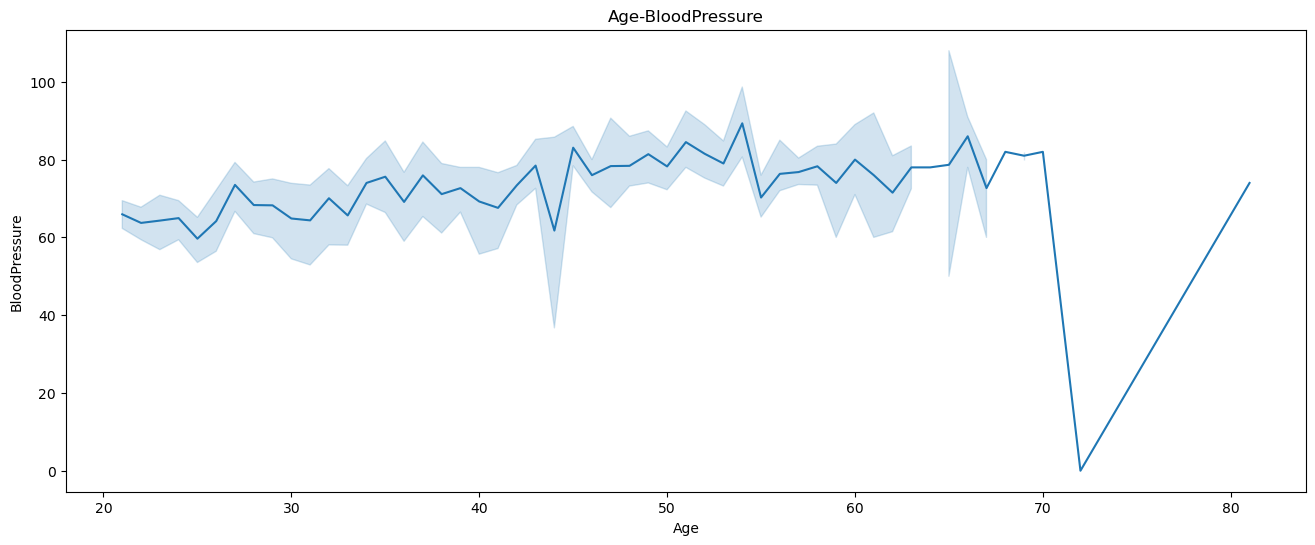

In [7]:
plt.figure(figsize=(16,6))
plt.title("Age-BloodPressure")
sns.lineplot(x=data["Age"],y=data["BloodPressure"])
plt.show()

<Axes: xlabel='Age'>

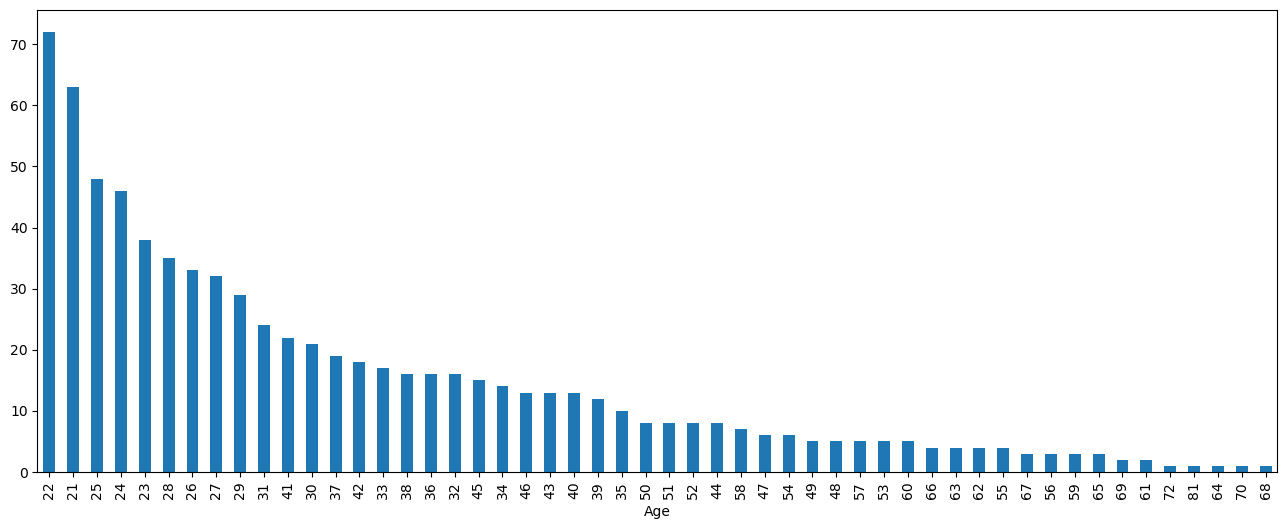

In [8]:
plt.figure(figsize=(16,6))
data.Age.value_counts().plot(kind="bar")

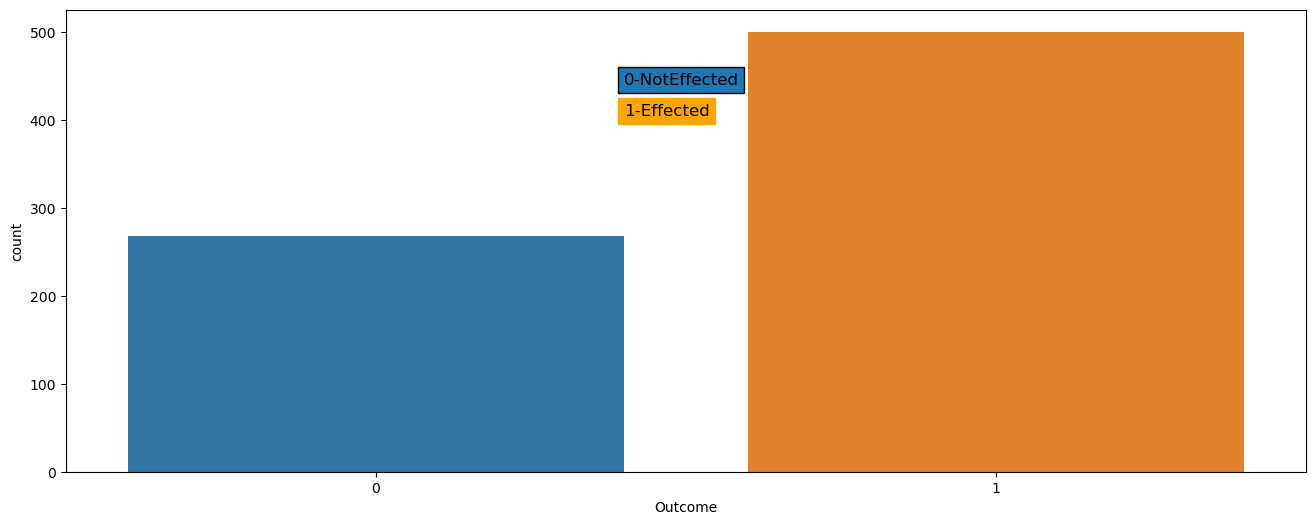

In [9]:
plt.figure(figsize=(16,6))
plt.text(0.4,440,"0-NotEffected",fontsize=12,bbox=dict())
plt.text(0.4,405,"1-Effected",fontsize=12,bbox=dict(color="orange"))
sns.barplot(x=data["Outcome"],y=data.Outcome.value_counts())
plt.show()

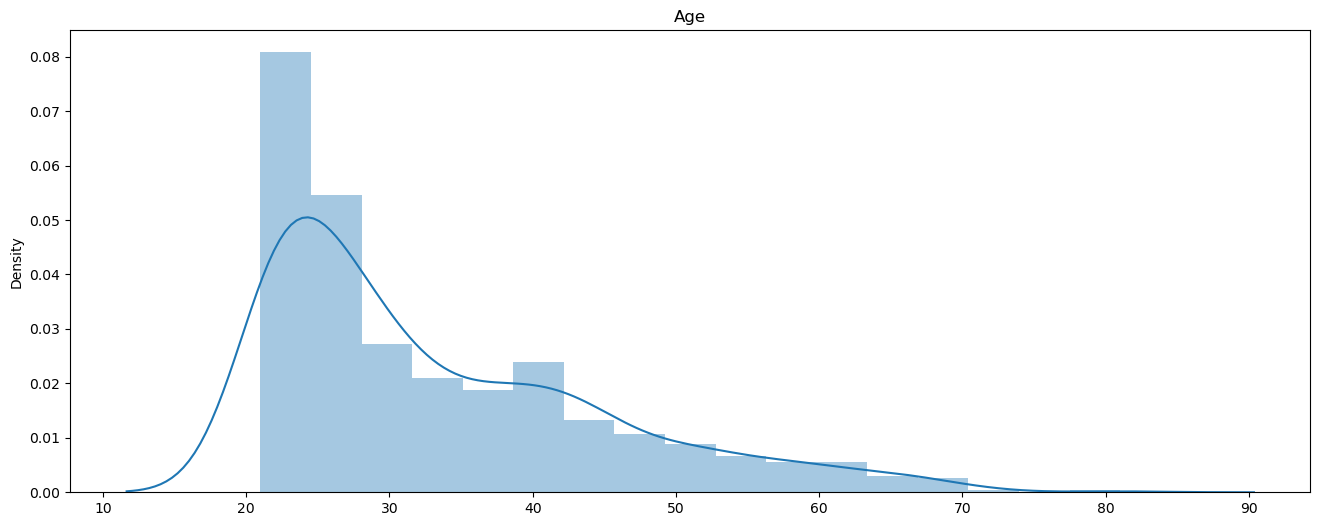

In [10]:
plt.figure(figsize=(16,6))
plt.title("Age")
sns.distplot(x=data["Age"])
plt.show()

In [11]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
y=data["Outcome"]

In [14]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
x=data.drop("Outcome",axis=1)

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<Axes: >

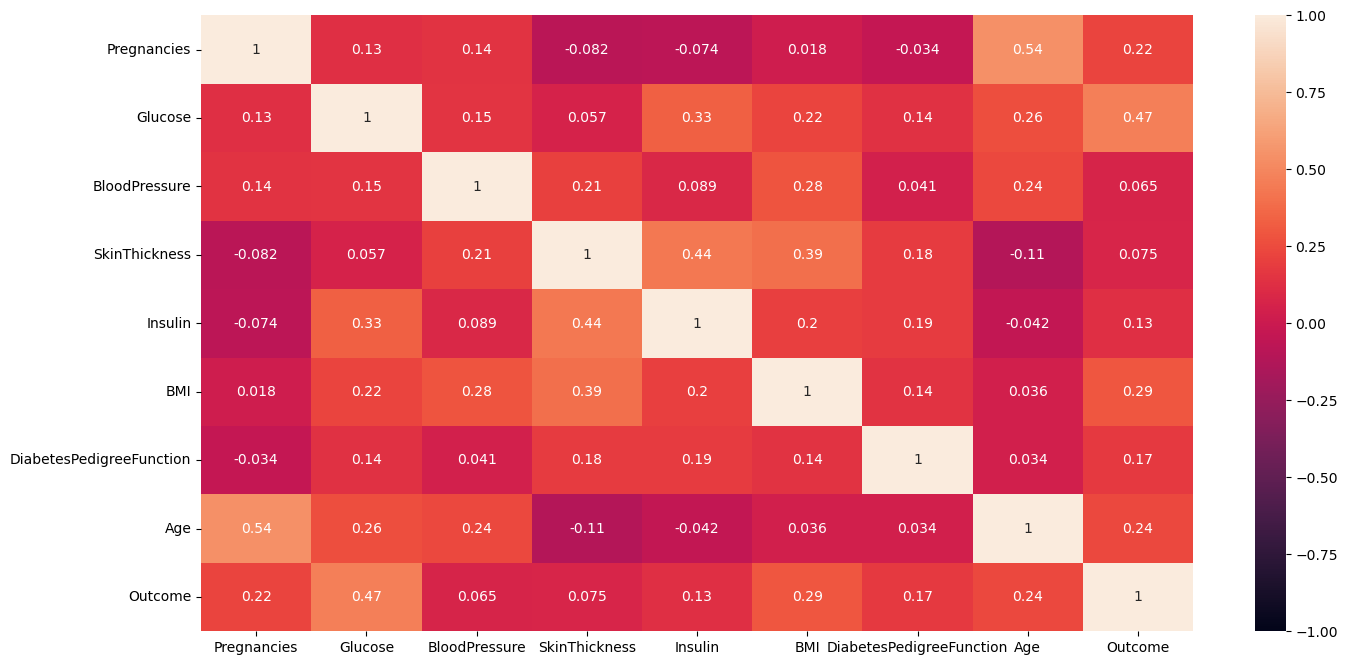

In [17]:
a=data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(a,annot=True,vmin=-1,vmax=1)

In [18]:
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


###  LogisticRegression

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=74)

In [20]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
708,9,164,78,0,0,32.8,0.148,45
311,0,106,70,37,148,39.4,0.605,22
66,0,109,88,30,0,32.5,0.855,38
415,3,173,84,33,474,35.7,0.258,22
87,2,100,68,25,71,38.5,0.324,26


In [21]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
564,0,91,80,0,0,32.4,0.601,27
544,1,88,78,29,76,32.0,0.365,29
580,0,151,90,46,0,42.1,0.371,21
327,10,179,70,0,0,35.1,0.200,37
586,8,143,66,0,0,34.9,0.129,41


In [22]:
y_train.head()

708    1
311    0
66     1
415    1
87     0
Name: Outcome, dtype: int64

In [23]:
y_test.head()

564    0
544    0
580    1
327    0
586    1
Name: Outcome, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [25]:
reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
ypred=reg.predict(x_test)

In [27]:
ypred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8385416666666666

In [29]:
len(ypred)

192

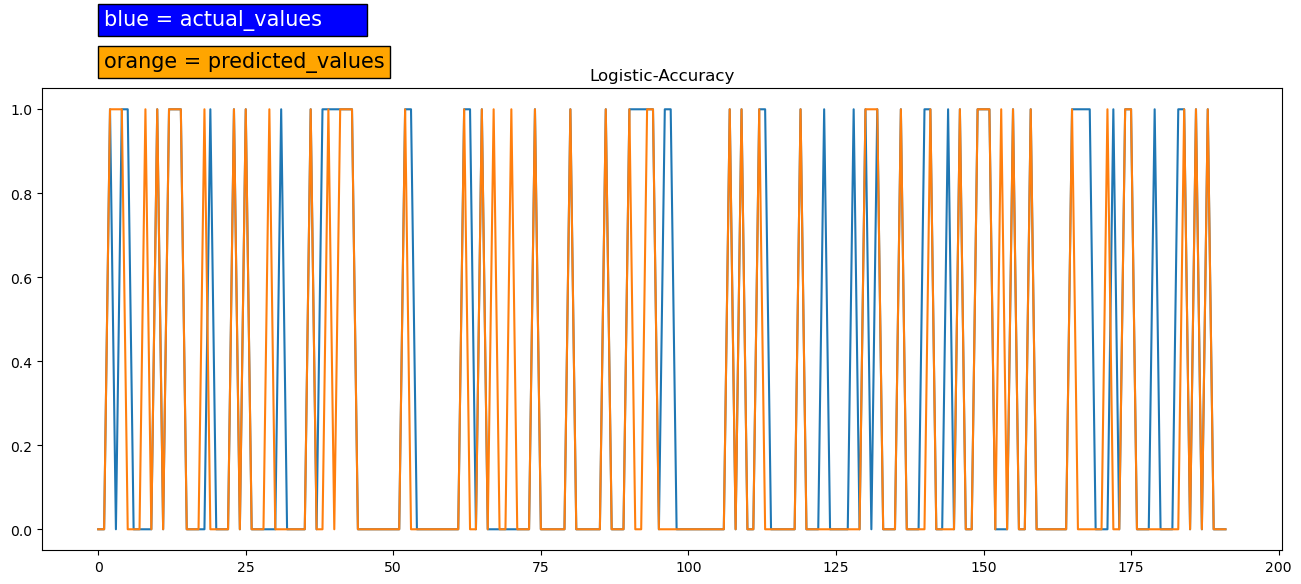

In [30]:
plt.figure(figsize=(16,6))
plt.title("Logistic-Accuracy")
x=np.arange(192)
plt.text(1,1.2,"blue = actual_values      ",fontsize=15,color="white",bbox=dict(facecolor="blue"))
plt.text(1,1.1,"orange = predicted_values",fontsize=15,color="black",bbox=dict(facecolor="orange"))
plt.plot(x,y_test)
plt.plot(x,ypred)

###  RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
reg1=RandomForestClassifier()

In [33]:
reg1.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
ypred1=reg1.predict(x_test)

In [35]:
ypred1

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,ypred1)

0.8020833333333334

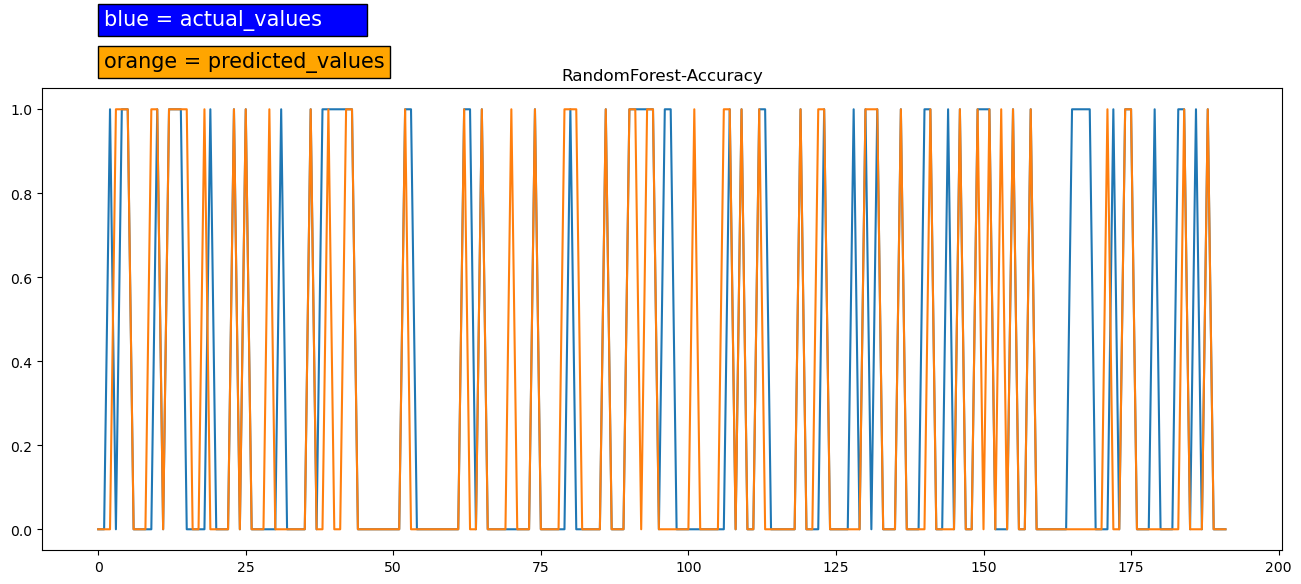

In [38]:
plt.figure(figsize=(16,6))
plt.title("RandomForest-Accuracy")
x=np.arange(192)
plt.text(1,1.2,"blue = actual_values      ",fontsize=15,color="white",bbox=dict(facecolor="blue"))
plt.text(1,1.1,"orange = predicted_values",fontsize=15,color="black",bbox=dict(facecolor="orange"))
plt.plot(x,y_test)
plt.plot(x,ypred1)

### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm=confusion_matrix(y_test,ypred)

<Axes: title={'center': 'ConfusionMatrix-LogisticRegression'}>

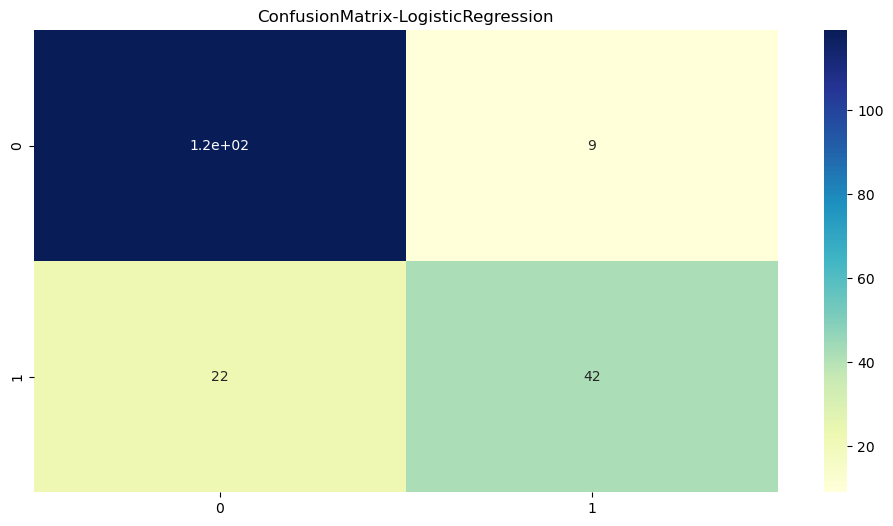

In [41]:
plt.figure(figsize=(12,6))
plt.title("ConfusionMatrix-LogisticRegression")
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [42]:
cm1=confusion_matrix(y_test,ypred1)

<Axes: title={'center': 'ConfusionMatrix-Randomforest'}>

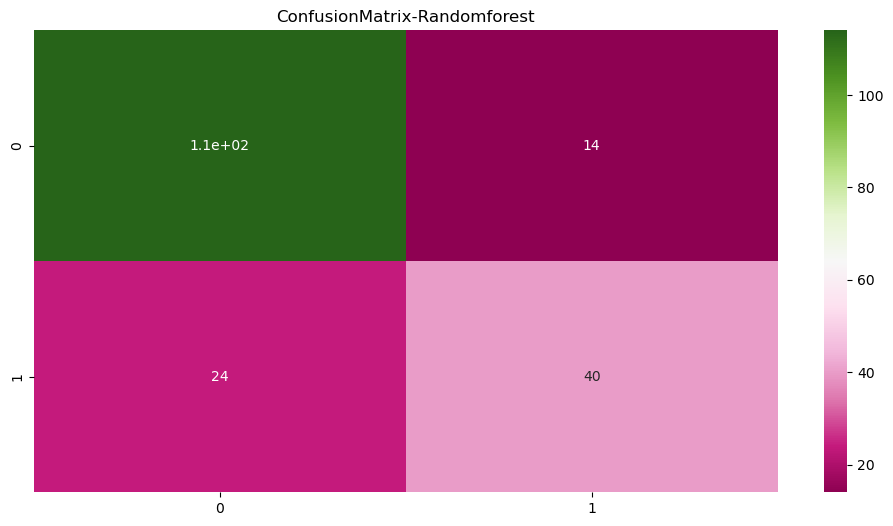

In [43]:
plt.figure(figsize=(12,6))
plt.title("ConfusionMatrix-Randomforest")
sns.heatmap(cm1,annot=True,cmap="PiYG")

###  Prediction

In [44]:
p={"Pregnancies":3,"Glucose":117,"BloodPressure":90,"SkinThickness":32,"Insulin":128,"BMI":32,"DiabetesPedigreeFunction":0.2,"Age":30}
f=pd.DataFrame(p,index=[0])

In [45]:
reg.predict(f)

array([0], dtype=int64)